In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_0 = pd.read_csv('/Users/oliveyang/Techlent/HW/mlcamp-week09-afu9/notebooks/red_download_1w.csv')
df_0.head(3)

,Unnamed: 0,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,...,HOA/MONTH,STATUS,URL,SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE,id
0,0,PAST SALE,December-21-2017,Condo/Co-op,598 Louisiana Ave #2,Brooklyn,NY,11239.0,350000.0,2.0,...,379.0,Sold,http://www.redfin.com/NY/Brooklyn/598-Louisian...,MLSLI,2948523.0,N,Y,40.647620,-73.886807,NY_0
1,1,PAST SALE,August-15-2019,Condo/Co-op,580 Louisiana Ave #2,Brooklyn,NY,11239.0,350000.0,2.0,...,NaN,Sold,http://www.redfin.com/NY/Brooklyn/580-Louisian...,MLSLI,3119971.0,N,Y,40.647620,-73.886807,NY_1
2,2,PAST SALE,NaN,Multi-Family (2-4 Unit),10210 Avenue K,Brooklyn,NY,11236.0,615825.0,NaN,...,NaN,NaN,http://www.redfin.com/NY/Brooklyn/10210-Avenue...,NaN,NaN,N,Y,40.642834,-73.892748,NY_2


In [3]:
df_0.shape

(11183, 27)

In [4]:
df_0.columns

Index(['Unnamed: 0', 'SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS',
       'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS',
       'BATHS', 'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT',
       'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'URL',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE',
       'id'],
      dtype='object')

In [5]:
# only keep NY
df_0['STATE OR PROVINCE'].unique()

array(['NY', 'IL', 'OS', nan, 'CT'], dtype=object)

In [6]:
df_1 = df_0[df_0['STATE OR PROVINCE'] == 'NY']

In [7]:
# all the 'sale type' is "PAST SALE", 
# all the 'STATE OR PROVINCE' is "NY" so thes features is removed.
df_1.drop(['Unnamed: 0', 'SALE TYPE', 'STATE OR PROVINCE', 'STATUS', 'SOURCE', 'MLS#',
          'FAVORITE', 'INTERESTED'], axis = 1, inplace = True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
# drop all duplicates URLs, because they are not too many.
count_duplicate = df_1.groupby('URL').count()
index_dup = count_duplicate[count_duplicate['id'] == 2].index
df_2 = df_1[~ df_1.URL.isin(index_dup)]

In [9]:
df_2.head()

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,URL,LATITUDE,LONGITUDE,id
0,December-21-2017,Condo/Co-op,598 Louisiana Ave #2,Brooklyn,11239.0,350000.0,2.0,2.0,Landings At Spring Creek,1017.0,NaN,1989.0,765.0,344.0,379.0,http://www.redfin.com/NY/Brooklyn/598-Louisian...,40.647620,-73.886807,NY_0
1,August-15-2019,Condo/Co-op,580 Louisiana Ave #2,Brooklyn,11239.0,350000.0,2.0,2.0,The Landings,1025.0,NaN,1989.0,163.0,341.0,NaN,http://www.redfin.com/NY/Brooklyn/580-Louisian...,40.647620,-73.886807,NY_1
2,NaN,Multi-Family (2-4 Unit),10210 Avenue K,Brooklyn,11236.0,615825.0,NaN,2.0,NaN,1612.0,1927.0,1955.0,NaN,382.0,NaN,http://www.redfin.com/NY/Brooklyn/10210-Avenue...,40.642834,-73.892748,NY_2
3,June-29-2017,Condo/Co-op,1368 E 92 St #301,Brooklyn,11236.0,320000.0,2.0,2.0,Canarsie,800.0,NaN,1987.0,940.0,400.0,268.0,http://www.redfin.com/NY/Brooklyn/1368-E-92nd-...,40.637119,-73.900574,NY_3
4,May-24-2017,Townhouse,1728 Rockaway Pkwy,Brooklyn,11236.0,360000.0,3.0,2.0,Canarsie,1280.0,2351.0,1920.0,976.0,281.0,NaN,http://www.redfin.com/NY/Brooklyn/1728-Rockawa...,40.639098,-73.895921,NY_4


In [10]:
# check missing values
missing_rate = df_2.isnull().sum()/df_2.shape[0]*100
print(missing_rate.sort_values())
missing_rate.sort_values().plot.barh(figsize = (4, 6))

SQUARE FEET            0.000000
LATITUDE               0.000000
URL                    0.000000
YEAR BUILT             0.000000
LONGITUDE              0.000000
id                     0.000000
PROPERTY TYPE          0.000000
ZIP OR POSTAL CODE     0.045041
PRICE                  0.045041
$/SQUARE FEET          0.054049
CITY                   0.099090
ADDRESS                1.225115
BEDS                   1.243131
BATHS                  2.414197
DAYS ON MARKET         2.432213
SOLD DATE              2.432213
LOCATION               3.044771
LOT SIZE              31.177371
HOA/MONTH             85.316638
dtype: float64


- According to the the bar chart above, more than 90% percent of HOA/month is missing, this feature would be removed.
- Although more than 30% of the feature "LOT size" is missing, the house may not have lot. The missing of this feature can be filled with 0.
- The percentage of missing values of 'sold date', 'baths' and 'beds' are not big, and these features are important in model. So the records with missing values of these features should be dropped. 

In [11]:
df_2.drop('HOA/MONTH', axis = 1, inplace = True)
df_2.dropna(subset = ['SOLD DATE', 'BEDS', 'BATHS'], inplace = True)
df_2.shape

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(10694, 18)

- Categorical variables: 7
- Numerical variables: 11
- date variable: 1

In [12]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10694 entries, 0 to 11182
Data columns (total 18 columns):
SOLD DATE             10694 non-null object
PROPERTY TYPE         10694 non-null object
ADDRESS               10560 non-null object
CITY                  10685 non-null object
ZIP OR POSTAL CODE    10689 non-null float64
PRICE                 10694 non-null float64
BEDS                  10694 non-null float64
BATHS                 10694 non-null float64
LOCATION              10626 non-null object
SQUARE FEET           10694 non-null float64
LOT SIZE              7300 non-null float64
YEAR BUILT            10694 non-null float64
DAYS ON MARKET        10694 non-null float64
$/SQUARE FEET         10693 non-null float64
URL                   10694 non-null object
LATITUDE              10694 non-null float64
LONGITUDE             10694 non-null float64
id                    10694 non-null object
dtypes: float64(11), object(7)
memory usage: 1.6+ MB


In [13]:
df_2.tail(3)

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,URL,LATITUDE,LONGITUDE,id
11180,January-28-2018,Condo/Co-op,189-34 37 Ave Unit 2Fl,Flushing,11358.0,490000.0,1.0,1.0,Bayside West Condo,850.0,NaN,1935.0,727.0,576.0,http://www.redfin.com/NY/Unknown/189-34-37th-A...,40.762203,-73.792048,NY_11180
11181,May-2-2017,Multi-Family (2-4 Unit),42-27 167 St,Flushing,11365.0,1950000.0,5.0,4.0,Flushing,3000.0,6000.0,1935.0,998.0,650.0,http://www.redfin.com/NY/Flushing/4227-167-St-...,40.758522,-73.799224,NY_11181
11182,May-8-2018,Single Family Residential,41-22 169th St,Flushing,11358.0,1250000.0,4.0,4.5,Flushing,3000.0,4300.0,1940.0,627.0,417.0,http://www.redfin.com/NY/Flushing/41-22-169th-...,40.759423,-73.797794,NY_11182


 - EDA of 'property type' and 'city'
- There're 5 'property type', one-hot encoder is a good way to encode this variable.  
- 99 cities totally. This variable will not be used in first model, because 'longtitude' and latitude can represent information of location.

In [14]:
df_2.groupby('PROPERTY TYPE').count()

,SOLD DATE,ADDRESS,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,URL,LATITUDE,LONGITUDE,id
PROPERTY TYPE,,,,,,,,,,,,,,,,,
Condo/Co-op,3692,3653,3690,3691,3692,3692,3692,3634,3692,479,3692,3692,3692,3692,3692,3692,3692
Multi-Family (2-4 Unit),2072,2022,2072,2072,2072,2072,2072,2071,2072,1996,2072,2072,2072,2072,2072,2072,2072
Multi-Family (5+ Unit),43,43,43,43,43,43,43,43,43,42,43,43,43,43,43,43,43
Single Family Residential,3636,3603,3630,3632,3636,3636,3636,3628,3636,3544,3636,3636,3635,3636,3636,3636,3636
Townhouse,1251,1239,1250,1251,1251,1251,1251,1250,1251,1239,1251,1251,1251,1251,1251,1251,1251


In [15]:
df_3 = df_2[~df_2['PROPERTY TYPE'].isin(['Multi-Family (5+ Unit)', 'Unknown', 'Vacant Land'])]

In [16]:
df_3.groupby('PROPERTY TYPE').count()

,SOLD DATE,ADDRESS,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,URL,LATITUDE,LONGITUDE,id
PROPERTY TYPE,,,,,,,,,,,,,,,,,
Condo/Co-op,3692,3653,3690,3691,3692,3692,3692,3634,3692,479,3692,3692,3692,3692,3692,3692,3692
Multi-Family (2-4 Unit),2072,2022,2072,2072,2072,2072,2072,2071,2072,1996,2072,2072,2072,2072,2072,2072,2072
Single Family Residential,3636,3603,3630,3632,3636,3636,3636,3628,3636,3544,3636,3636,3635,3636,3636,3636,3636
Townhouse,1251,1239,1250,1251,1251,1251,1251,1250,1251,1239,1251,1251,1251,1251,1251,1251,1251


In [17]:
df_3.groupby(['CITY', 'PROPERTY TYPE']).count().sort_values(by = 'SOLD DATE', ascending = False)[0:50]

SOLD DATE  ADDRESS  \
CITY               PROPERTY TYPE                                   
Staten Island      Single Family Residential       1868     1864   
Bronx              Condo/Co-op                     1252     1252   
                   Multi-Family (2-4 Unit)          980      979   
                   Single Family Residential        681      680   
Staten Island      Townhouse                        666      666   
Flushing           Condo/Co-op                      223      219   
Staten Island      Condo/Co-op                      157      157   
Bayside            Condo/Co-op                      155      151   
Brooklyn           Multi-Family (2-4 Unit)          154      149   
Kew Gardens        Condo/Co-op                      143      143   
Jackson Heights    Condo/Co-op                      141      132   
Brooklyn           Condo/Co-op                      140      139   
                   Townhouse                        123      123   
Rego Park          Condo/Co-op                      122      121   
Forest Hills       Condo/Co-op                      116      114   
Floral Park        Condo/Co-op                      110      110   
Queens Village     Single Family Residential         98       97   
New York           Condo/Co-op                       97       97   
Elmhurst           Condo/Co-op                       86       84   
Flushing           Single Family Residential         80       80   
Brooklyn           Single Family Residential         79       79   
Glen Oaks          Condo/Co-op                       73       73   
Bronx              Townhouse                         72       72   
Bayside            Single Family Residential         64       59   
Woodside           Condo/Co-op                       63       60   
College Point      Multi-Family (2-4 Unit)           62       55   
Fresh Meadows      Single Family Residential         61       58   
Astoria            Multi-Family (2-4 Unit)           60       59   
Maspeth            Multi-Family (2-4 Unit)           59       57   
Astoria            Condo/Co-op                       58       58   
Little Neck        Condo/Co-op                       57       57   
Briarwood          Condo/Co-op                       56       55   
Beechhurst         Condo/Co-op                       54       53   
Ozone Park         Multi-Family (2-4 Unit)           53       52   
Kew Garden Hills   Condo/Co-op                       52       51   
Flushing           Multi-Family (2-4 Unit)           50       46   
Jamaica            Multi-Family (2-4 Unit)           48       48   
                   Single Family Residential         46       46   
Bayside            Multi-Family (2-4 Unit)           44       37   
College Point      Condo/Co-op                       43       39   
Woodhaven          Multi-Family (2-4 Unit)           40       39   
E. Elmhurst        Condo/Co-op                       37       36   
S. Ozone Park      Single Family Residential         37       36   
College Point      Single Family Residential         37       34   
call Listing Agent Condo/Co-op                       36       36   
Douglaston         Condo/Co-op                       36       36   
Flushing           Townhouse                         35       35   
Whitestone         Condo/Co-op                       35       35   
Rockaway Park      Condo/Co-op                       34       34   
Woodside           Multi-Family (2-4 Unit)           34       30   

                                              ZIP OR POSTAL CODE  PRICE  BEDS  \
CITY               PROPERTY TYPE                                                
Staten Island      Single Family Residential                1868   1868  1868   
Bronx              Condo/Co-op                              1252   1252  1252   
                   Multi-Family (2-4 Unit)                   980    980   980   
                   Single Family Residential                 681    681   681   
Staten Island      Town

In [18]:
df_3.groupby('BEDS').count()

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,ZIP OR POSTAL CODE,PRICE,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,URL,LATITUDE,LONGITUDE,id
BEDS,,,,,,,,,,,,,,,,,
0.0,232,232,229,232,232,232,232,229,232,39,232,232,231,232,232,232,232
1.0,1631,1631,1611,1631,1631,1631,1631,1602,1631,237,1631,1631,1631,1631,1631,1631,1631
2.0,2008,2008,1990,2005,2007,2008,2008,1985,2008,749,2008,2008,2008,2008,2008,2008,2008
3.0,3263,3263,3229,3260,3260,3263,3263,3252,3263,2839,3263,3263,3263,3263,3263,3263,3263
4.0,1513,1513,1497,1512,1512,1513,1513,1512,1513,1455,1513,1513,1513,1513,1513,1513,1513
5.0,837,837,818,835,837,837,837,836,837,810,837,837,837,837,837,837,837
6.0,645,645,631,645,645,645,645,645,645,626,645,645,645,645,645,645,645
7.0,236,236,231,236,236,236,236,236,236,228,236,236,236,236,236,236,236
8.0,166,166,164,166,166,166,166,166,166,161,166,166,166,166,166,166,166


In [19]:
df_3.groupby('BATHS').count()

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,URL,LATITUDE,LONGITUDE,id
BATHS,,,,,,,,,,,,,,,,,
0.25,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.50,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2
1.00,3231,3231,3197,3230,3230,3231,3231,3189,3231,844,3231,3231,3230,3231,3231,3231,3231
1.25,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1.50,676,676,664,676,676,676,676,675,676,483,676,676,676,676,676,676,676
1.75,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2.00,3046,3046,3016,3043,3044,3046,3046,3025,3046,2433,3046,3046,3046,3046,3046,3046,3046
2.25,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2.50,758,758,747,758,758,758,758,757,758,647,758,758,758,758,758,758,758


In [20]:
df_4 = df_3[(df_3.BEDS < 9) & (df_3.BEDS > 0) & (df_3.BATHS <= 6) & (df_3.BATHS >= 1)]

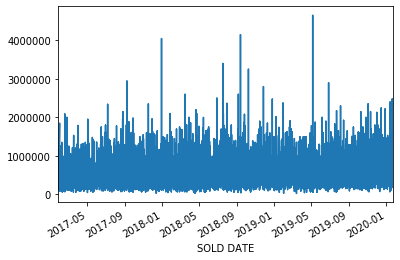

In [21]:
purchase_date = pd.to_datetime(df_4['SOLD DATE'])
price = df_4.PRICE
price.index = purchase_date

price.plot()

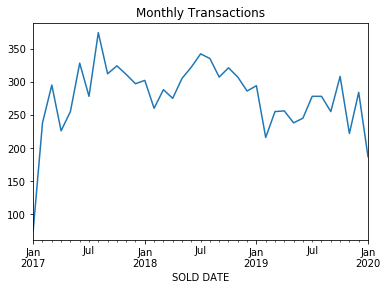

In [22]:
price.resample('M').count().plot(title = 'Monthly Transactions')

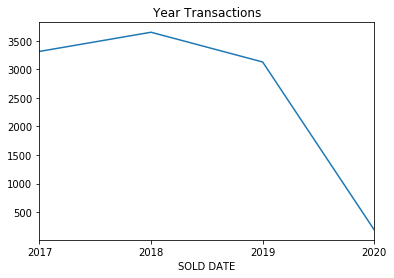

In [23]:
price.resample('Y').count().plot(title = 'Year Transactions')

In [24]:
# fill missing value of 'LOT SIZE' with 0, means the house didn't have 'LOT'
df_4['LOT SIZE'] = df_4['LOT SIZE'].fillna(0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
df_4['purchase_date'] = purchase_date
df_4['month'] = df_4['purchase_date'].dt.month

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
train_raw = df_4[purchase_date.between('2017-01-01', '2019-06-30')].reset_index(drop = True)
test_raw = df_4[purchase_date.between('2019-07-01', '2020-01-30')].reset_index(drop = True)

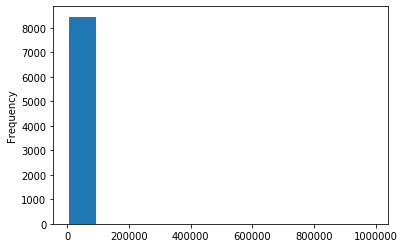

In [27]:
import matplotlib.pyplot as plt
train_raw['SQUARE FEET'].plot.hist(bins = 10, rwidth = 0.9)

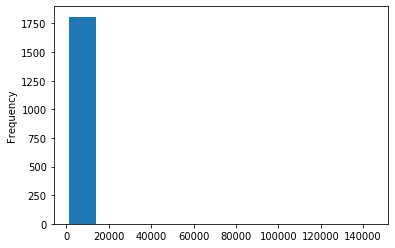

In [28]:
test_raw['SQUARE FEET'].plot.hist(bins = 10, rwidth = 0.9)

In [29]:
train_raw['SQUARE FEET'].sort_values()

12           9.0
583         12.0
433         17.0
2214        22.0
5205       337.0
          ...   
783     145460.0
4878    285052.0
4187    421800.0
5239    491050.0
5244    994520.0
Name: SQUARE FEET, Length: 8468, dtype: float64

In [30]:
test_raw['SQUARE FEET'].sort_values()

1386       400.0
870        431.0
195        450.0
148        480.0
61         500.0
          ...   
1186      6600.0
1315      7000.0
1443     16896.0
198      65392.0
196     145446.0
Name: SQUARE FEET, Length: 1812, dtype: float64

In [31]:
z_sq = stats.zscore(train_raw['SQUARE FEET'])
z_price = stats.zscore(train_raw['PRICE'])

z_sq_test = stats.zscore(test_raw['SQUARE FEET'])
z_price_test = stats.zscore(test_raw['PRICE'])

In [32]:
df_5_train = train_raw[(abs(z_sq) < 2) & (abs(z_price) < 2)]
df_5_test = test_raw[(abs(z_sq_test) < 2) & (abs(z_price_test) < 2)]

In [33]:
df_5_train['SQUARE FEET'].sort_values()

12          9.0
583        12.0
433        17.0
2214       22.0
5205      337.0
         ...   
114      9500.0
605     10000.0
6532    13569.0
2014    15742.0
1309    24732.0
Name: SQUARE FEET, Length: 8114, dtype: float64

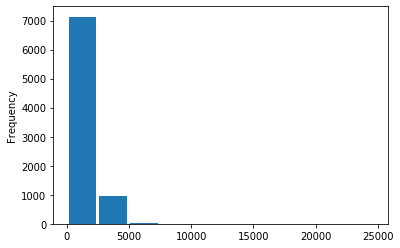

In [34]:
df_5_train['SQUARE FEET'].plot.hist(bins = 10, rwidth = 0.9)

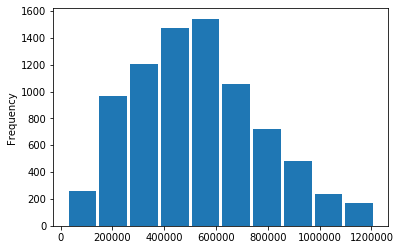

In [35]:
df_5_train['PRICE'].plot.hist(bins = 10, rwidth = 0.9)

In [36]:
df_5_train['YEAR BUILT'].sort_values()[0:10]

3422    1010.0
751     1025.0
8007    1055.0
141     1195.0
874     1845.0
7009    1848.0
6908    1859.0
822     1870.0
3918    1880.0
7542    1880.0
Name: YEAR BUILT, dtype: float64

In [37]:
df_6_train = df_5_train[(df_5_train['YEAR BUILT'] < 2020) & (df_5_train['YEAR BUILT'] > 1800)]
df_6_test = df_5_test[(df_5_test['YEAR BUILT'] < 2020) & (df_5_test['YEAR BUILT'] > 1800)]

- There're too many observations, so there's no obvious pattern in the plot below.

- From 2017 to 2019, the transactions in Redfin dropped year by year.
- August and September had the peak transactions in 2017 and 2018, but they didn't get the highest transactions in 2019.

In [38]:
print(purchase_date.min(), purchase_date.max())

2017-01-25 00:00:00 2020-01-24 00:00:00


In [39]:
df_7_train = df_6_train[['purchase_date', 'month', 'PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS',
            'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'LATITUDE', 'LONGITUDE']]
df_8_train = pd.get_dummies(df_7_train)

(9.5, -0.5)

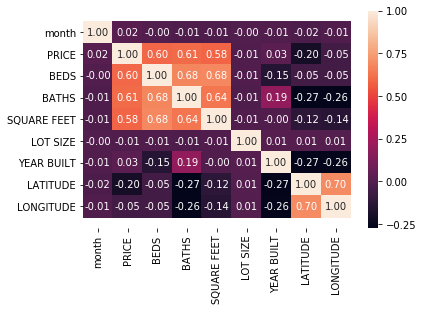

In [40]:
import seaborn as sns
ax = sns.heatmap(df_7_train.corr(), annot = True, fmt= ".2f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [41]:
df_7_test = df_6_test[['purchase_date', 'month', 'PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS',
            'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'LATITUDE', 'LONGITUDE']]
df_8_test = pd.get_dummies(df_7_test)

In [42]:
train = df_8_train.drop('purchase_date', axis = 1)
features = list(train.columns)
target = 'PRICE'
features.remove(target)

X_train = train[features]
y_train = train[target]

In [43]:
X_train.shape

(8108, 12)

In [44]:
#test = df_8_test.drop('purchase_date', axis = 1)
X_test = df_8_test[features]
y_test = df_8_test[target]

In [45]:
X_test.shape

(1725, 12)

In [46]:
X_train.head(3)

,month,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,LATITUDE,LONGITUDE,PROPERTY TYPE_Condo/Co-op,PROPERTY TYPE_Multi-Family (2-4 Unit),PROPERTY TYPE_Single Family Residential,PROPERTY TYPE_Townhouse
0,12,2.0,2.0,1017.0,0.0,1989.0,40.647620,-73.886807,1,0,0,0
1,6,2.0,2.0,800.0,0.0,1987.0,40.637119,-73.900574,1,0,0,0
2,5,3.0,2.0,1280.0,2351.0,1920.0,40.639098,-73.895921,0,0,0,1


In [72]:
X_train.columns

Index(['month', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT',
       'LATITUDE', 'LONGITUDE', 'PROPERTY TYPE_Condo/Co-op',
       'PROPERTY TYPE_Multi-Family (2-4 Unit)',
       'PROPERTY TYPE_Single Family Residential', 'PROPERTY TYPE_Townhouse'],
      dtype='object')

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
from sklearn.pipeline import Pipeline
steps=[('rescale', MinMaxScaler()),
    ('lr', LinearRegression())]

model = Pipeline(steps=steps)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

train MSE: 2.88e+10
train MAE: 1.31e+05
train R2: 0.515
test MSE: 3.27e+10
test MAE: 1.35e+05
test R2: 0.494


Text(0, 0.5, 'y_test_pred')

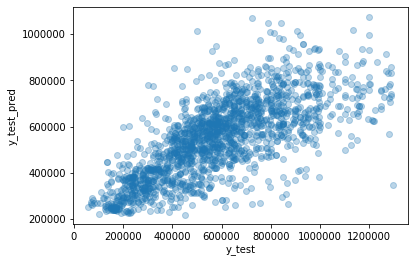

In [49]:
plt.scatter(y_test, y_test_pred, alpha = 0.3)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

steps=[('rescale', MinMaxScaler()),
    ('rfr', RandomForestRegressor())]

model = Pipeline(steps=steps)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

train MSE: 1.32e+09
train MAE: 2.52e+04
train R2: 0.978
test MSE: 1.20e+10
test MAE: 7.64e+04
test R2: 0.813


Text(0, 0.5, 'y_test_pred')

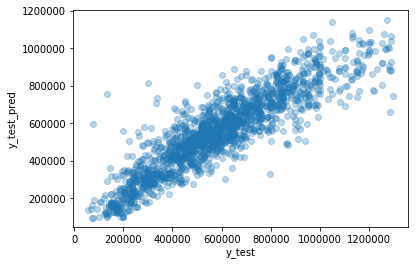

In [55]:
plt.scatter(y_test, y_test_pred, alpha = 0.3)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

In [56]:
steps=[('rescale', MinMaxScaler()),
    ('xgbr', XGBRegressor())]

model = Pipeline(steps=steps)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[16:17:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train MSE: 1.03e+10
train MAE: 7.52e+04
train R2: 0.826
test MSE: 1.44e+10
test MAE: 8.72e+04
test R2: 0.777


In [64]:
pct = (y_test_pred - y_test)/y_test
(abs(pct) < 0.05).sum()/len(pct)

0.27420289855072466

In [65]:
model.steps

[('rescale', MinMaxScaler(copy=True, feature_range=(0, 1))),
 ('rfr', RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        max_samples=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=None, oob_score=False,
                        random_state=None, verbose=0, warm_start=False))]

In [69]:
model.steps[1][1].feature_importances_

array([0.01460465, 0.01794334, 0.04756677, 0.47674566, 0.05338549,
       0.05740425, 0.21574062, 0.09553952, 0.00920598, 0.00641525,
       0.0033813 , 0.00206718])

In [70]:
model.steps[0][1]

MinMaxScaler(copy=True, feature_range=(0, 1))